# Classifying Heart Disease

In this project I will be using the database from the Cleveland Clinic Foundation that uses data from various patients, such as thier sex, age, BMI etc. to look at if they have heart disease or not. For this we will be using the classic logistic regression classification machine learning algorithim.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
heart = pd.read_csv('heart_disease.csv')
heart.head(10)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,7,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,8,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,9,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,10,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


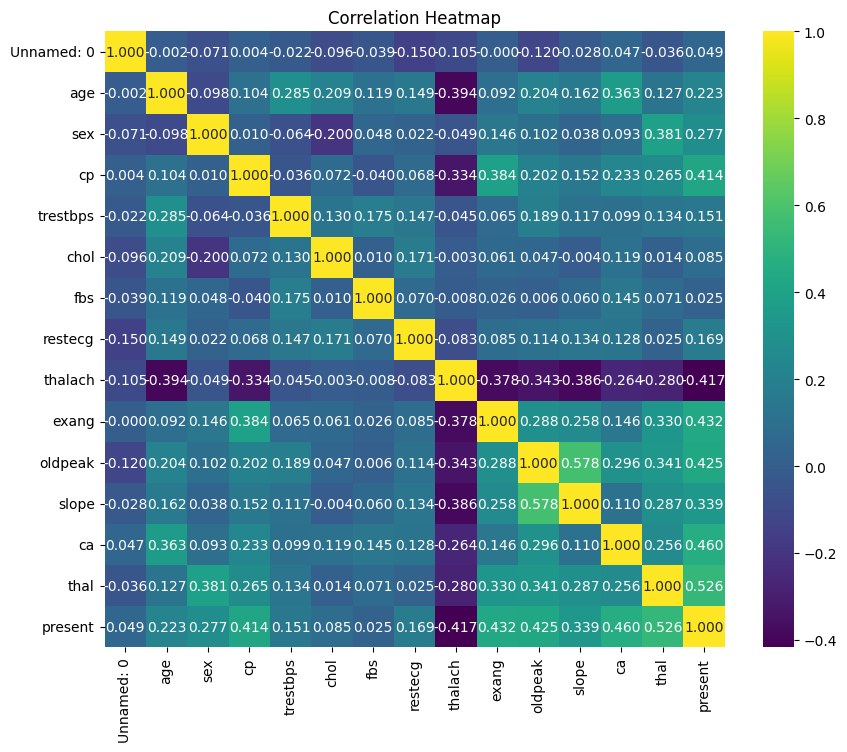

In [ ]:
# Replace '?' with NaN
heart = heart.replace('?', np.nan)

# Convert columns with object dtype to numeric if possible
for col in heart.select_dtypes(include=['object']).columns:
    try:
        heart[col] = pd.to_numeric(heart[col])
    except ValueError:
        print(f"Could not convert column '{col}' to numeric - it might contain non-numeric values other than '?'")
        # Handle the column differently, e.g., drop it, or use one-hot encoding if categorical

# Now calculate the correlation
corr = heart.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()

Let's choose all the correlations that are greater than 0.4, to choose our predictors for the model.

In [ ]:
filtered_corr = corr[(corr['present'] > 0.4) | (corr['present'] < -0.4)]
filtered_corr

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
cp,0.003700,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.414446
thalach,-0.105488,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.417167
exang,-0.000402,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.431894
oldpeak,-0.120384,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.424510
ca,0.046938,0.362605,0.093185,0.233214,0.098773,0.119000,0.145478,0.128343,-0.264246,0.145570,0.295832,0.110119,1.000000,0.256382,0.460442
thal,-0.035685,0.127389,0.380936,0.265246,0.133554,0.014214,0.071358,0.024531,-0.279631,0.329680,0.341004,0.287232,0.256382,1.000000,0.525689
present,0.048765,0.223120,0.276816,0.414446,0.150825,0.085164,0.025264,0.169202,-0.417167,0.431894,0.424510,0.339213,0.460442,0.525689,1.000000


In [ ]:
filtered_corr['present'].sort_values(ascending=False)

,present
present,1.000000
thal,0.525689
ca,0.460442
exang,0.431894
oldpeak,0.424510
cp,0.414446
thalach,-0.417167


We can see that the best predictors for the present target variable excluding the target variable itself are: thal, ca, exang, oldpeak, and cp. This also matches the information we know about heart disease. Thal is variable for thalassemia that is hemoglobin disorder caused by anemia or iron overload which is known to be cause for heart disease. Another one is ca which is number of major blood vessels coloured by fluoroscopy in other words coronary artery disease (blocked artery). Exang is exercise induced angina which is caused by a defecient supply of oxygen to the heart due to physical activity which is usually due to a blockage of an artery. Oldpeak is the ST depression reached indcued by exercise relative to rest and cp is constrictive percarditis which is when the membrane around the heart becomes thickened and stiff causing insufficent beating. So let's choose these 5 features for our model.

In [ ]:
nan_count = heart.isna().sum().sum()
print(f"Total number of NaN values in the dataset: {nan_count}")

Total number of NaN values in the dataset: 6


The total number of NaN values in the entire dataframe is 6 which is about 2% of the entire dataset, so in this case dropping the NaN rows would most definitely be the better option. It is more straightforward and avoids potential bias with minimal data loss.

In [ ]:
X = heart[['thal', 'ca', 'exang', 'oldpeak', 'cp']].dropna()
y = heart.loc[X.index,'present']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100, test_size=0.25)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Now that we fitted the model on the training dataset we can calculate the accuracy, specificity, and sensitivity of the model. For that we will use the confusion matrix and from the confusion matrix take the true positives (tp), true negatives (tn), false postives (fp) and false negatives (fn) to calculate all three values.

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_train, model.predict(X_train)).ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy for training data: {accuracy:.3f}")
print(f"Sensitivity for training data: {sensitivity:.3f}")
print(f"Specificity for training data: {specificity:.3f}")

Accuracy for training data: 0.824
Sensitivity for training data: 0.779
Specificity for training data: 0.864


Looking at the accuracy, sensitivity, and specificity I would say the model has performed well. Accuracy is around 82%, sensitivity is around 78% and specificity 86% which is good I would say is good. Now let's get the coefficients on both log-odds and odds scales, we will find the coefficients for all features while holding other features constant

In [ ]:
feature_names = X_train.columns

coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

print('coefficients (log-odds scale):')
for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef:.3f}')

print('\ncoefficients (odds scale):')
for feature, odds in zip(feature_names, odds_ratios):
    print(f'{feature}: {odds:.3f}')

coefficients (log-odds scale):
thal: 0.480
ca: 0.903
exang: 1.228
oldpeak: 0.344
cp: 0.465

coefficients (odds scale):
thal: 1.616
ca: 2.466
exang: 3.413
oldpeak: 1.411
cp: 1.593


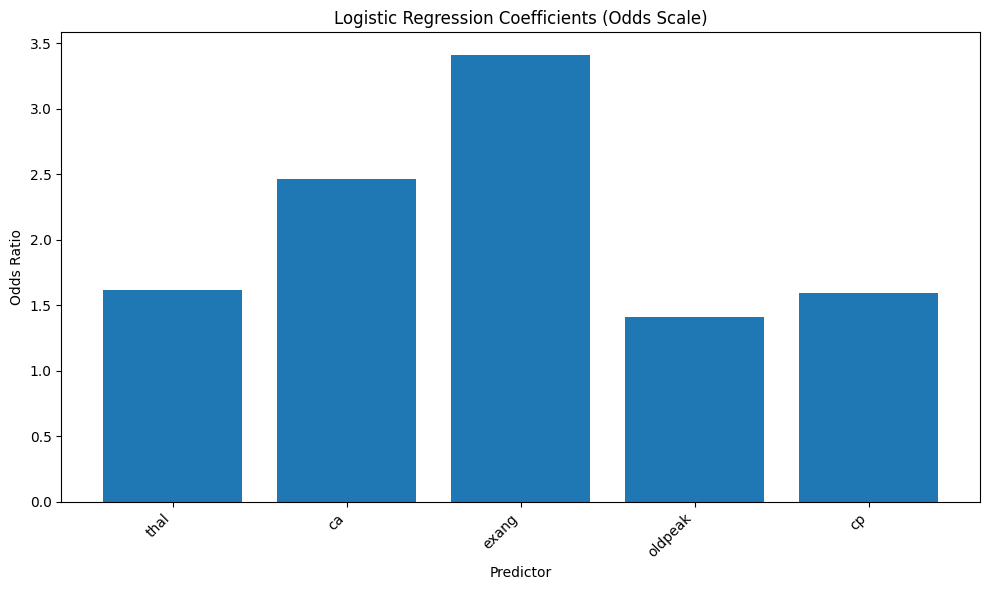

In [ ]:
# Get coefficients (odds scale)
coefficients_odds = np.exp(model.coef_[0])

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, coefficients_odds)
plt.xlabel("Predictor")
plt.ylabel("Odds Ratio")
plt.title("Logistic Regression Coefficients (Odds Scale)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Looking at the coeffcients for the odds scale we can see that excang or exercise induced angina has the highest jump of 3.4 times compared to all other predictors. Meaning a one unit increase in exang equals 3.4 times increase in odds of having heart disease. This is assuming all other predictors are held constant. This makes sense since many health journals seem to conclude that angina caused by physical activity gives out the highest odds of developing heart disease or atleast the diagnosis of heart diease happens most often when people develop symptoms of angina caused after exercise. Although it is not fully accurate as ca and exang are closely linked since a blocked artery can cause exercise induced angina, which is why ca has the second highest value.

Now let's test this model out on the test sample of the data.

In [ ]:
y_pred = model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

accuracy_test = (tp + tn) / (tp + tn + fp + fn)
sensitivity_test = tp / (tp + fn)
specificity_test = tn / (tn + fp)

print(f"Accuracy for test data: {accuracy_test:.3f}")
print(f"Sensitivity for test data: {sensitivity_test:.3f}")
print(f"Specificity for test data: {specificity_test:.3f}")

Accuracy for test data: 0.880
Sensitivity for test data: 0.909
Specificity for test data: 0.857


Wow! The model performed better than expected. The accuracy and sensitivity both increased while specificity decresed but not by a lot. Accuracy got 88%, sensitivity got 91% and specificity got 86% which I would say is success. The model did a good job learning from the training data and the model was good fit for the data to predict the outcome of having heart disease or not. let's visualize the confusion matrix to see how good the model performed.

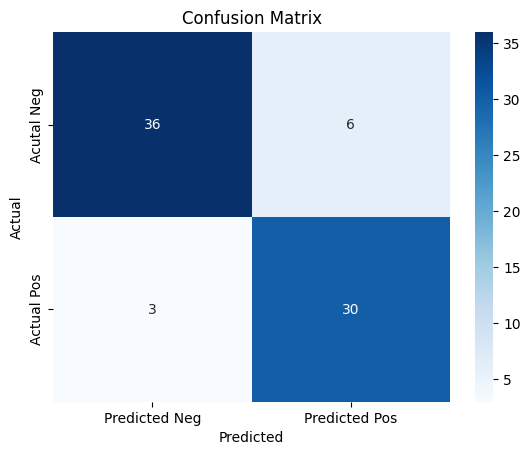

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Neg', 'Predicted Pos'],
            yticklabels= ['Acutal Neg','Actual Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Looking at the confusion matrix we can see the following observations:

True Negatives : 36 times the model correctly predicted that the patient does not have heart diease.

False Negatives: 3 times the model incorrectly predicted the patient does not have heart diease when infact they do.

False Positive: 6 times the model incorrectly predicted that the patient has heart diease when infact they don't.

True Positive: 30 times the model correctly predicted that the patient has heart diease.

This gives us accuracy of 88%!

Let's plot the ROC curve to see how good it performed.

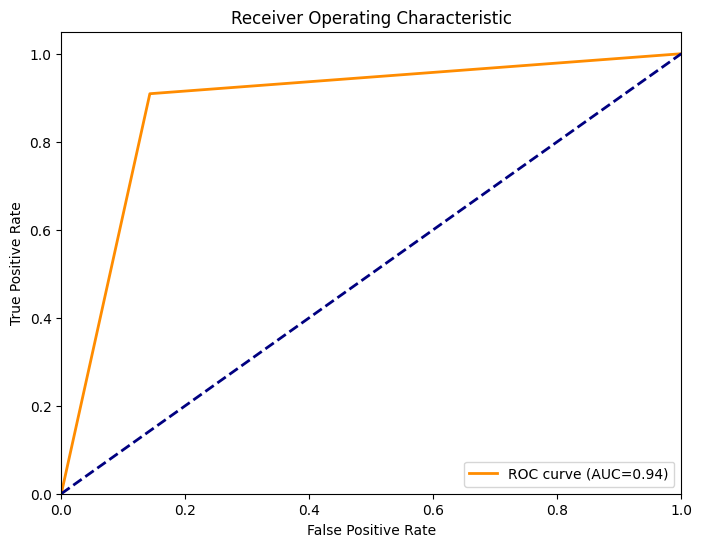

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Looking at the ROC and AUC we can see that model perfoemd pretty nicely. The AUC is 0.94 very close to 1 meaning it almost predcited all the positive values correctly. The actual curve sharply increases towards 1 and then sharpely plateaus at around FPR~0.2. It sticks to to TPR of aroud 0.9 which is to be expected as predicting heart diease can involve a lot more factors than the 5 factors we considered.

Let's visualize all the decision boundaries for all the 5 predcitors using PCA which will help reduce the 5 dimensionality problem into 2 dimensions to see how the model to make's it's descion.

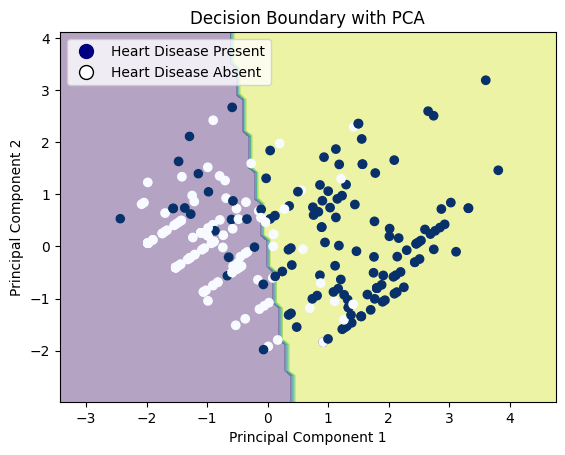

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.lines as mlines

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

principleDf = pd.DataFrame(data=X_pca, columns=['principal component 1', 'principal component 2'])

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principleDf, y, test_size=0.25, random_state=100)

model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train_pca)

# create a meshgrid of points in the 2D PCA space

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# predict the class for each point in the meshgrid

prediction_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['principal component 1', 'principal component 2'])
Z = model_pca.predict(prediction_data)
Z = Z.reshape(xx.shape)

# plot the descision boundary as a countour or surface

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Blues')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary with PCA')
blue_dot = mlines.Line2D([], [], color='navy', marker='o', linestyle='None',
                          markersize=10, label='Heart Disease Present')
white_dot = mlines.Line2D([], [], color='white', marker='o', linestyle='None',
                          markersize=10, label='Heart Disease Absent',
                          markeredgecolor='black')
plt.legend(handles=[blue_dot, white_dot])
plt.show()

Seems like principle component 1 plays a much more important role in the decision making process of the model than principle component 2. We can confirm this by quick check of the explained variance ratio and model coefficients. If both are larger for PC1 we can be confident that PC1 is what matters more.

In [ ]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Logistic Regression Coefficients:", model_pca.coef_)

Explained Variance Ratio: [0.42083684 0.18100654]
Logistic Regression Coefficients: [[1.44240973 0.21745393]]


Confirmed! PC1 matters more, now we can see the loadings of PCA analysis but only considiring PC1 since it has larger explained varaince ratio and coefficient.

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns).sort_values(by='PC1', key=abs, ascending=False)
loadings_df

,PC1,PC2
thal,0.694715,0.066483
exang,0.675109,-0.495840
oldpeak,0.663122,0.344029
cp,0.642582,-0.430219
ca,0.565906,0.595289


# Conclusion

This analysis aimed to predict heart disease using logistic regression, and the results indicate that thal and exang are the most influential predictors.

PCA revealed that PC1, primarily influenced by thal and exang, plays a dominant role in the model's decision-making. This is supported by a higher explained variance ratio of 0.421 compared with 0.181 for PC2. Also PC1 has a larger PC1 coefficient value of 1.442 compared with a coefficient value of 0.217 for PC2.The loadings for the thal and exang were the highest with readings of 0.69 and 0.67 respectively. Therefore, the model predicts whether or not a patient has heart disease based on these main two features. Although, I would like to add that the other features (oldpeak, cp, ca) all are very close in influencing the model's predictions. In other words if patient has higher chances of Thalassemia and exercise induced angina the chances of diagnosing a positive result for heart disease are much higher. We can see that in the PCA space we plotted above. The blue dots represent a positive diagnosis while the white dots represent a negative diagnosis. We can see that a positive score for PC1 almost always results in a positive diagnosis while the case is not as clear with PC2. The results strongly suggest that higher rates of exercise indcued angina and Thalassemia will be related to higher rates of heart disease. We cannot be so clear about PC2 but we do see that exang and ca does heavily influence PC2 and higher positive values for PC2 do give some overlapping with negative and positive diagnosis.

This is further proven by a strong ROC cruve and a strong AUC score which shows us an area of 0.94 very close 1. That tells us the model did a great job of predicting whether or not a patient will have heart disease. This is further proven by the accuracy score of 88% which is very good, determined by the confusion matrix which predicted a very good number of true positives and negatives.

The logistic regression model does have some limitations. For example, the model only considered 5 variables, but heart disease may be related to various other unkown and known factors not accounted for in the analysis. There could also be bias in the data, for example the sample of data might be from a specific country,city, or state with a different diet and not representative of the whole population. It also makes assumptions about the variables like independance when many of these variables are linked. For example exang and ca and closely linked, coronary artery disease is usually the cause for exercise induced angina because blood cannot be supplied to the heart after intense physical activity causing heart disease symptoms. This is proven in the logisitic coefficients (odds scale) bar graph were ca is second highest (2.5) and exang (3.4) is the highest. In this case a more complex model, new variables or feature engineering might be required for a better result.

Since correlation does not equal causation I will conclude this analysis with fact that doctors should pay close attention to patients with higher rates of exercise induced angina and Thalassemia to diagnose heart disease and see if these could be a cause.